In [1]:
import numpy as np
import pandas as pd
import qstock as qs
from statsmodels.regression.rolling import RollingOLS
import statsmodels.api as sm
import pickle
import quantstats
import datetime
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif'] = ['SimHei']#Áî®Êù•ÊòæÁ§∫‰∏≠ÊñáÊ†áÁ≠æ
plt.rcParams['axes.unicode_minus'] = False#Áî®Êù•Ê≠£Â∏∏ÊòæÁ§∫Ë¥üÂè∑

In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in Matplo

In [2]:
def saveRegressionResults(filepath,results):
    ''''
    filepath: ‰øùÂ≠òË∑ØÂæÑ/Êñá‰ª∂Âêç
    results: ÂõûÂΩíÁªìÊûú
    '''
    with open(filepath, 'wb') as f:
        pickle.dump(results, f)

In [3]:
def openRegressionResults(filepath):
    ''''
    filepath: ‰øùÂ≠òË∑ØÂæÑ/Êñá‰ª∂Âêç
    results: ÂõûÂΩíÁªìÊûú
    '''
    with open(filepath, 'rb') as f:
        load_model = pickle.load(f)
    return load_model

# Ëé∑ÂèñÊï∞ÊçÆ

In [ ]:
# È¢ÑÂÖàÁî®excelÂ§ÑÁêÜËøáST„ÄÅÈÄÄÂ∏ÇÂíåBËÇ°Âíå‰∏äÂ∏Ç‰∏çË∂≥60Â§©ÁöÑËÇ°Á•®
code = pd.read_excel('TRD_co.xlsx')
stock_name = code.iloc[:,1]
his_data = qs.get_data(stock_name,start='20180101',end='20221231', fqt=2)
his_data['return'] = his_data.groupby('code')['close'].pct_change()
his_data['date'] = his_data.index
his_data = his_data.dropna()

# risk free return
rf = qs.ib_rate()
rf['Êä•ÂëäÊó•'] = pd.to_datetime(rf['Êä•ÂëäÊó•'])
rf=rf.loc[rf['Êä•ÂëäÊó•']>'2018-01-01']
rf = rf.set_index('Êä•ÂëäÊó•')
rf

In [5]:
# ‰∏âÂõ†Â≠êÊï∞ÊçÆ
factors = pd.read_excel('STK_MKT_THRFACDAY.xlsx')
factors['TradingDate'] = pd.to_datetime(factors['TradingDate'])
factors = factors.set_index('TradingDate')
factors

RiskPremium1      SMB1      HML1
TradingDate                                  
2018-01-02       0.013264 -0.003363  0.005018
2018-01-03       0.005993  0.001940 -0.005753
2018-01-04       0.004030 -0.004029 -0.002465
2018-01-05       0.001945  0.000196  0.003868
2018-01-08       0.003841 -0.003801  0.003753
...                   ...       ...       ...
2022-12-26       0.007776  0.011487 -0.012163
2022-12-27       0.009958 -0.007401  0.002709
2022-12-28      -0.004848 -0.008969  0.007287
2022-12-29      -0.004740  0.000564 -0.006366
2022-12-30       0.004391  0.004382  0.004507

[1215 rows x 3 columns]

In [ ]:
processData = his_data.merge(factors,left_on='date', right_on='TradingDate',how='inner')

In [ ]:
processData.to_csv('processData.csv',encoding = 'utf_8_sig')

# ‰º†ÁªüÁâπË¥®Ê≥¢Âä®ÁéáÂõ†Â≠êÁöÑËÆ°ÁÆó

## FFÂõûÂΩí

HCOÔºöÊÄÄÁâπÂºÇÊñπÂ∑ÆÁ®≥ÂÅ•Ê†áÂáÜËØØ

Áî±‰∫éAËÇ°Â∏ÇÂú∫ÂΩì‰∏≠ÊØè‰∏Ä‰∏™Ê†∑Êú¨ÈÉΩÂÖ∑Êúâ‰∏™‰ΩìÂõ∫ÂÆöÊïàÂ∫îÂíåÊà™Èù¢ÂºÇÊñπÂ∑ÆÈóÆÈ¢òÔºåÂõ†Ê≠§ÈúÄË¶ÅÈÄâÁî®ÂºÇÊñπÂ∑ÆÁ®≥ÂÅ•Ê†áÂáÜËØØÊù•ÁºìËß£ÂºÇÊñπÂ∑ÆÈóÆÈ¢ò

Fama-MacBeth RegressionÊòØ‰∏ÄÁßç‰∏§Ê≠•Êà™Èù¢ÂõûÂΩíÊ£ÄÈ™åÊñπÊ≥ïÔºåÊéíÈô§‰∫ÜÊÆãÂ∑ÆÂú®Êà™Èù¢‰∏äÁöÑÁõ∏ÂÖ≥ÊÄßÂØπÊ†áÂáÜËØØÁöÑÂΩ±Âìç

In [4]:
processData = pd.read_csv('processData.csv')
processData = processData.drop(columns='Unnamed: 0',axis=1)
stock_code = list(set(processData.code))
processData['date'] = pd.to_datetime(processData['date'])
processData['year'] = processData['date'].dt.year
processData = processData.set_index('date')
processData.drop(index=datetime.datetime(2018,1,2),axis=0,inplace=True)
processData

name    code      open      high       low     close  volume  \
date                                                                       
2018-01-03  Áî≥ÂçéÊéßËÇ°  600653  34162.08  34511.35  33812.80  34511.35   58231   
2018-01-03  Ê±áÈÄöËÉΩÊ∫ê  600605    313.82    317.18    313.58    316.94    3779   
2018-01-03  Ê∑±Â∫∑‰Ω≥Ôº°      16    109.62    111.42    109.62    111.24  153677   
2018-01-03  ‰∫ëËµõÊô∫ËÅî  600602   3381.94   3482.76   3377.14   3429.95   69470   
2018-01-03  ‰∏≠ÂõΩÂÆùÂÆâ       9     58.89     59.85     58.73     59.69  230921   
...          ...     ...       ...       ...       ...       ...     ...   
2018-06-01   Âêå‰ªÅÂ†Ç  600085    383.60    384.72    359.08    370.36  182004   
2018-06-01  ÊòéÊòüÁîµÂäõ  600101     43.28     43.78     42.92     43.21   17238   
2018-06-01  Êñ∞ËäùÁîüÁâ©  430685     10.83     12.05     10.83     12.05     120   
2018-06-01  ÂπøÂ∑ûÂèëÂ±ï  600098     26.95     27.13     26.77     26.84   34696   
2018-06-01  ÂçéÂ≤≠ËÇ°‰ªΩ  430139     15.59     15.77     15.55     15.77     670   

               turnover  turnover_rate    return TradingDate  RiskPremium1  \
date                                                                         
2018-01-03   15820442.0           0.33  0.010224  2018-01-03      0.005993   
2018-01-03    5146011.0           0.26  0.006095  2018-01-03      0.005993   
2018-01-03   95236414.0           0.96  0.016447  2018-01-03      0.005993   
2018-01-03   50023064.0           0.79  0.005629  2018-01-03      0.005993   
2018-01-03  170636550.0           1.09  0.013585  2018-01-03      0.005993   
...                 ...            ...       ...         ...           ...   
2018-06-01  704779120.0           1.33 -0.043591  2018-06-01     -0.007854   
2018-06-01   13147503.0           0.53 -0.008263  2018-06-01     -0.007854   
2018-06-01      39530.0           0.03  0.124067  2018-06-01     -0.007854   
2018-06-01   23552070.0           0.13 -0.006662  2018-06-01     -0.007854   
2018-06-01     220120.0           0.05  0.014148  2018-06-01     -0.007854   

                SMB1      HML1  year  
date                                  
2018-01-03  0.001940 -0.005753  2018  
2018-01-03  0.001940 -0.005753  2018  
2018-01-03  0.001940 -0.005753  2018  
2018-01-03  0.001940 -0.005753  2018  
2018-01-03  0.001940 -0.005753  2018  
...              ...       ...   ...  
2018-06-01 -0.000625  0.007961  2018  
2018-06-01 -0.000625  0.007961  2018  
2018-06-01 -0.000625  0.007961  2018  
2018-06-01 -0.000625  0.007961  2018  
2018-06-01 -0.000625  0.007961  2018  

[4728987 rows x 15 columns]

In [ ]:
%%time
stock_code = list(set(processData.code))
x = factors
x = sm.add_constant(x)
exog = ['const','RiskPremium1','SMB1','HML1']
results = {}
window = 20
for stock in stock_code:
    y = processData.loc[processData.code==stock]
    y.drop_duplicates('TradingDate',inplace=True)
    y = y['return']
    y = pd.concat([y,0.01*rf['1Êúà']],axis=1,join='inner')
    y = pd.DataFrame(y['return'] - y['1Êúà'],columns=['ex_ret'])
    panel = pd.concat([x,y],axis=1,join = 'inner')
    panel = panel.dropna(axis=0)
    result = RollingOLS(panel['ex_ret'],panel[exog],window = window).fit(cov_type='HC0')
    results[stock] = result

In [ ]:
%%time
# Á®≥ÂÅ•ÊÄßÊ£ÄÈ™åÔºöÂ∞ÜÊî∂ÁõäÁéáÂèò‰∏∫t+1Êúü(‰ª•‰∏ã‰∏ÄÊúüÊî∂ÁõäÁéá‰Ωú‰∏∫Êú¨ÊúüÈ¢ÑÊúüÊî∂ÁõäÁéáËøõË°åÈ¢ÑÊµã)
stock_code = list(set(processData.code))
x = factors
x = sm.add_constant(x)
exog = ['const','RiskPremium1','SMB1','HML1']
results = {}
window = 20
for stock in stock_code:
    y = processData.loc[processData.code==stock]
    y.drop_duplicates('TradingDate',inplace=True)
    y = y['return'].shift(-1)
    y = pd.concat([y,0.01*rf['1Êúà']],axis=1,join='inner')
    y = pd.DataFrame(y['return'] - y['1Êúà'],columns=['ex_ret'])
    panel = pd.concat([x,y],axis=1,join = 'inner')
    panel = panel.dropna(axis=0)
    result = RollingOLS(panel['ex_ret'],panel[exog],window = window).fit(cov_type='HC0')
    results[stock] = result
    
mean_ID_Vol_dict = {} 
ID_Vol_TS_dict = {}
for key in stock_code:
    ID_Vol_TS_dict[key] = (np.sqrt(results[key].mse_resid))
    mean_ID_Vol_dict[key] = (np.sqrt(results[key].mse_resid.mean()))
    
ID_Vol_list = pd.DataFrame(mean_ID_Vol_dict.values(),index=stock_code) #ÊääindexËÆæ‰∏∫stock codeÊñπ‰æøËØÜÂà´ÈÄâËÇ°
ID_Vol_list['code'] = stock_code
ID_Vol_list['group'] = pd.qcut(ID_Vol_list.iloc[:,0],5,labels=[1,2,3,4,5])

# Â∞ÜÁâπË¥®Ê≥¢Âä®ÁéáÂàÜÁªÑÂØπÂ∫îÂà∞ËÇ°Á•®‰∏ä
group1 = ID_Vol_list.loc[ID_Vol_list['group']==1].code
group2 = ID_Vol_list.loc[ID_Vol_list['group']==2].code
group3 = ID_Vol_list.loc[ID_Vol_list['group']==3].code
group4 = ID_Vol_list.loc[ID_Vol_list['group']==4].code
group5 = ID_Vol_list.loc[ID_Vol_list['group']==5].code

DataGroup1 = processData.loc[processData.code.isin(group1) ]
DataGroup2 = processData.loc[processData.code.isin(group2) ]
DataGroup3 = processData.loc[processData.code.isin(group3) ]
DataGroup4 = processData.loc[processData.code.isin(group4) ]
DataGroup5 = processData.loc[processData.code.isin(group5) ]

# ÂáÄÂÄº
nv_group1 = (1+DataGroup1.groupby('date')['return'].mean()).cumprod()
nv_group2 = (1+DataGroup2.groupby('date')['return'].mean()).cumprod()
nv_group3 = (1+DataGroup3.groupby('date')['return'].mean()).cumprod()
nv_group4 = (1+DataGroup4.groupby('date')['return'].mean()).cumprod()
nv_group5 = (1+DataGroup5.groupby('date')['return'].mean()).cumprod()
net_value_panel = pd.DataFrame(data = {'Group1':nv_group1,'Group2':nv_group2,'Group3':nv_group3,'Group4':nv_group4,'Group5':nv_group5})
net_value_panel.plot(title='net value',figsize=(20,6))

ÂØπ‰∫éËØØÂ∑ÆÈ°πÊù•ËØ¥ÔºåÂùáÊñπËØØ=ÊñπÂ∑Æ„ÄÇÂõ†‰∏∫MSE(x_bar) = Var(x_bar) + [E(x_bar) - x]ÔºåÂç≥‰º∞ËÆ°ÈáèÊó†ÂÅèÊó∂ÂùáÊñπËØØÁ≠â‰∫éÊñπÂ∑Æ

### ‰øùÂ≠òÂõûÂΩíÁªìÊûúÔºàËøôÁßçÊñπÊ≥ïÂæàÂ∏∏Áî®Ôºâ

In [ ]:
filepath = r'ID_vol/classicIDvolRegression.pkl'
saveRegressionResults(filepath,results)

In [25]:
filepath = r'ID_vol/classicIDvolRegression.pkl'
load_model = openRegressionResults(filepath)
load_model

{688128: <statsmodels.regression.rolling.RollingRegressionResults at 0x2019614f308>,
 1: <statsmodels.regression.rolling.RollingRegressionResults at 0x20309bc7e08>,
 2: <statsmodels.regression.rolling.RollingRegressionResults at 0x20327ca4c48>,
 600815: <statsmodels.regression.rolling.RollingRegressionResults at 0x202feba1b08>,
 688129: <statsmodels.regression.rolling.RollingRegressionResults at 0x202eeb7e4c8>,
 688133: <statsmodels.regression.rolling.RollingRegressionResults at 0x2030ebcba08>,
 6: <statsmodels.regression.rolling.RollingRegressionResults at 0x203390bd108>,
 7: <statsmodels.regression.rolling.RollingRegressionResults at 0x20184af24c8>,
 8: <statsmodels.regression.rolling.RollingRegressionResults at 0x201848abfc8>,
 9: <statsmodels.regression.rolling.RollingRegressionResults at 0x2018518c148>,
 10: <statsmodels.regression.rolling.RollingRegressionResults at 0x2028a490d48>,
 11: <statsmodels.regression.rolling.RollingRegressionResults at 0x201848fbe08>,
 12: <statsmodels.

In [26]:
mean_ID_Vol_dict = {} 
ID_Vol_TS_dict = {}
stock_code = load_model.keys()
for key in load_model.keys():
    ID_Vol_TS_dict[key] = (np.sqrt(load_model[key].mse_resid))
    mean_ID_Vol_dict[key] = (np.sqrt(load_model[key].mse_resid.mean()))

Áõ∏ÊØîfor i in range(len(list))ÁöÑÊåâÁÖßÁ¥¢ÂºïÂæ™ÁéØËØªÂèñÂÖÉÁ¥†Êù•ËØ¥ÔºåÁõ¥Êé•for ÂÖÉÁ¥† in listÊõ¥Âø´ÔºàÁúÅÊéâ‰∫ÜÊ£ÄÁ¥¢Á¥¢ÂºïÁöÑÊ≠•È™§

ÊàñËÄÖÁî®enumerateÂêåÊó∂ÂÖºÈ°æÁ¥¢ÂºïÂíåÂÖÉÁ¥†Ôºö

for i, result in enumerate(example_list):

    print(i)
    
    print(result)

## ÂØπ‰º†ÁªüÁâπË¥®Ê≥¢Âä®ÁéáÂõ†Â≠êËøõË°åÂõûÊµã

### ÊåâÁÖßÁâπË¥®Ê≥¢Âä®ÁéáÂõ†Â≠êÂ§ßÂ∞èÁî®ÊéíÂ∫èÊ≥ïÂàÜÊàê‰∫îÁªÑ (ÂàÜÁªÑÊñπÊ≥ïË¶ÅÊ≥®ÊÑèÔºåÂæàÂ∏∏Áî®Ôºâ

ÊéíÂ∫èÊ≥ïÁî®qcut‰∏çÁî®cutÔºö‰øùËØÅÊØè‰∏ÄÁªÑÂèòÈáè‰∏™Êï∞Â∞ΩÈáèÁõ∏Âêå„ÄÇ

In [27]:
ID_Vol_list = pd.DataFrame(mean_ID_Vol_dict.values(),index=stock_code) #ÊääindexËÆæ‰∏∫stock codeÊñπ‰æøËØÜÂà´ÈÄâËÇ°
ID_Vol_list['code'] = stock_code
ID_Vol_list['group'] = pd.qcut(ID_Vol_list.iloc[:,0],5,labels=[1,2,3,4,5])
ID_Vol_list

0    code group
688128  0.027451  688128     4
1       0.013567       1     1
2       0.013160       2     1
600815  0.018663  600815     1
688129  0.017938  688129     1
...          ...     ...   ...
688122  0.028411  688122     4
688123  0.033728  688123     5
688125  0.032205  688125     5
688126  0.032997  688126     5
688127  0.032544  688127     5

[4887 rows x 3 columns]

In [28]:
# ÊØè‰∏ÄÁªÑÁöÑID_VolÊèèËø∞ÊÄßÁªüËÆ°
ID_Vol_list.groupby('group').describe()

0                                                              \
       count      mean       std       min       25%       50%       75%   
group                                                                      
1      978.0  0.015538  0.003152  0.003225  0.013765  0.016393  0.018082   
2      977.0  0.021263  0.001069  0.019306  0.020357  0.021311  0.022152   
3      977.0  0.024699  0.000914  0.023077  0.023920  0.024703  0.025522   
4      977.0  0.028198  0.001172  0.026316  0.027178  0.028145  0.029197   
5      978.0  0.044530  0.069036  0.030423  0.032223  0.034392  0.038982   

                  code                                                 \
            max  count           mean            std   min        25%   
group                                                                   
1      0.019304  978.0  390772.054192  281001.614938   1.0    2468.25   
2      0.023072  977.0  334379.633572  277817.384973  11.0    2468.00   
3      0.026316  977.0  323344.812692  263082.355010  10.0    2683.00   
4      0.030415  977.0  320022.601842  255919.728972   9.0    2895.00   
5      1.355458  978.0  436893.119632  267483.187461   7.0  300586.50   

                                      
            50%        75%       max  
group                                 
1      600311.0  601184.25  833819.0  
2      300964.0  601377.00  688981.0  
3      300602.0  601231.00  835184.0  
4      300610.0  601456.00  839729.0  
5      301223.5  688193.50  873527.0

<AxesSubplot:title={'center':'net value'}, xlabel='date'>

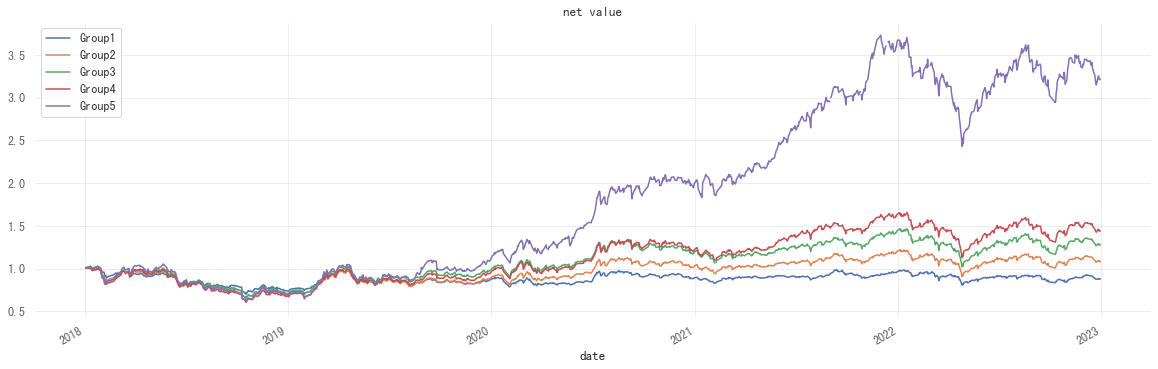

In [33]:
# Â∞ÜÁâπË¥®Ê≥¢Âä®ÁéáÂàÜÁªÑÂØπÂ∫îÂà∞ËÇ°Á•®‰∏äÔºåÁõ¥Êé•ËøôÊ†∑Áî®Êï¥‰∏™Âå∫Èó¥ÁöÑÂπ≥ÂùáÁâπË¥®Ê≥¢Âä®ÁéáÂàÜÁªÑÊòØÈîôËØØÁöÑÔºåÂºïÂÖ•‰∫ÜÊú™Êù•‰ø°ÊÅØ„ÄÇ‰ΩÜÊòØÊú∫ËÉΩÈôêÂà∂Âè™ÊòØÂÅöÊºîÁ§∫
group1 = ID_Vol_list.loc[ID_Vol_list['group']==1].code
group2 = ID_Vol_list.loc[ID_Vol_list['group']==2].code
group3 = ID_Vol_list.loc[ID_Vol_list['group']==3].code
group4 = ID_Vol_list.loc[ID_Vol_list['group']==4].code
group5 = ID_Vol_list.loc[ID_Vol_list['group']==5].code

DataGroup1 = processData.loc[processData.code.isin(group1) ]
DataGroup2 = processData.loc[processData.code.isin(group2) ]
DataGroup3 = processData.loc[processData.code.isin(group3) ]
DataGroup4 = processData.loc[processData.code.isin(group4) ]
DataGroup5 = processData.loc[processData.code.isin(group5) ]

# ÂáÄÂÄº
nv_group1 = (1+DataGroup1.groupby('date')['return'].mean()).cumprod()
nv_group2 = (1+DataGroup2.groupby('date')['return'].mean()).cumprod()
nv_group3 = (1+DataGroup3.groupby('date')['return'].mean()).cumprod()
nv_group4 = (1+DataGroup4.groupby('date')['return'].mean()).cumprod()
nv_group5 = (1+DataGroup5.groupby('date')['return'].mean()).cumprod()
net_value_panel = pd.DataFrame(data = {'Group1':nv_group1,'Group2':nv_group2,'Group3':nv_group3,'Group4':nv_group4,'Group5':nv_group5})
net_value_panel.plot(title='net value',figsize=(20,6))

‰∏Ä‰∏™list‰∏≠Â≠ò‰∫ÜÂæàÂ§ö‰∏™ÂÄºÔºåÊàë‰ª¨ÈúÄË¶ÅÊèêÂèñÂá∫Âú®Ëøô‰∏™ÂàóË°®‰∏≠Âá∫Áé∞ÁöÑÂÄºÁöÑÊâÄÊúâË°åÁöÑÊñπÊ≥ïÔºö

ÔºàÊØîÂ¶ÇÁî®ËÇ°Á•®‰ª£Á†ÅlistÊâæÂà∞procesDataÂΩì‰∏≠ÂØπÂ∫îËÇ°Á•®ÁöÑÊï∞ÊçÆÔºâ

processData.code.isin(stock_code)ÊØîdf[[x == list for x in processData.code]]Âø´ÂæàÂ§ö

ÊØè‰∏™ÁªÑÁöÑÂπ¥ÂåñÊî∂ÁõäÁéáËÆ°ÁÆóÊñπÊ≥ïÔºögroubyÔºàstock_codeÔºâ.pct_change(len(Tseries))ËÆ°ÁÆóÊØè‰∏™ËÇ°Á•®ÁöÑÂπ¥ÂåñÊî∂ÁõäÁéáÔºåÁÑ∂ÂêéÂ∞ÜÁªÑÈáåÊâÄÊúâÂπ¥ÂåñÊî∂ÁõäÁéáÂπ≥ÂùáÂç≥ÂèØ

ÂàÜÁªÑÊñπÊ≥ïÔºöÁ≠âÊùÉÊûÑÈÄ†ÁªÑÂêàËøõË°åÂõûÊµã

In [34]:
AnnualReturn_Group1 = pd.DataFrame((DataGroup1.groupby(['year','code'])['return'].mean())*250).groupby('year').mean()
AnnualReturn_Group2 = pd.DataFrame((DataGroup2.groupby(['year','code'])['return'].mean())*250).groupby('year').mean()
AnnualReturn_Group3 = pd.DataFrame((DataGroup3.groupby(['year','code'])['return'].mean())*250).groupby('year').mean()
AnnualReturn_Group4 = pd.DataFrame((DataGroup4.groupby(['year','code'])['return'].mean())*250).groupby('year').mean()
AnnualReturn_Group5 = pd.DataFrame((DataGroup5.groupby(['year','code'])['return'].mean())*250).groupby('year').mean()

print('lowÁªÑ:',AnnualReturn_Group1)
print('highÁªÑ:',AnnualReturn_Group5)
print('high - lowÂ§öÁ©∫ÁªÑÂêà:',AnnualReturn_Group5 - AnnualReturn_Group1)

lowÁªÑ:         return
year          
2018 -0.292698
2019  0.186272
2020 -0.033934
2021  0.051917
2022 -0.089387
highÁªÑ:         return
year          
2018  1.628507
2019  3.192821
2020  1.820386
2021  1.114153
2022 -0.075157
high - lowÂ§öÁ©∫ÁªÑÂêà:         return
year          
2018  1.921205
2019  3.006550
2020  1.854320
2021  1.062236
2022  0.014230


Ê†πÊçÆÂáÄÂÄºÂõæÊàë‰ª¨ÂèØ‰ª•ÁúãÂà∞,Ê≥¢Âä®ÁéáÊúÄÈ´òÁöÑÁªÑÂêàÊî∂ÁõäËøúÈ´ò‰∫éÂÖ∂‰ªñÁªÑÂêà,ËØ¥Êòé‰º†ÁªüÁâπË¥®Ê≥¢Âä®ÁéáÂõ†Â≠êÂú®ÂõûÊµãÂå∫Èó¥ÂÜÖË°®Áé∞‰∏ç‰Ω≥,Ëøô‰∏™ÂºÇË±°ÂèØËÉΩÂ∑≤ÁªèÊ∂àÂ§±

### ÂõûÊµã

In [35]:
# ËÆ°ÁÆóÂ§öÁ©∫ÁªÑÂêàÊó•Â∫¶Êî∂Áõä
Group5_PortRet = DataGroup5.groupby('TradingDate')[['return','year']].mean()
Group1_PortRet = DataGroup1.groupby('TradingDate')[['return','year']].mean()
high_low = Group5_PortRet - Group1_PortRet
high_low['year'] = Group1_PortRet['year']
high_low = high_low.reset_index()
high_low['TradingDate'] = pd.to_datetime(high_low['TradingDate'])
high_low = high_low.set_index(high_low['TradingDate'])

# Âπ¥ÂåñÊ≥¢Âä®
annual_vol_dict = {}
for year in range(2018,2023):
    annual_vol = quantstats.stats.volatility(high_low.loc[high_low.year==year]['return'],periods=250)
    annual_vol_dict[year]=annual_vol
    print(str(year),':',annual_vol)
    
# ÊúÄÂ§ßÂõûÊí§
max_dd_dict = {}
for year in range(2018,2023):
    max_dd = quantstats.stats.max_drawdown((1 + high_low.loc[high_low.year==year]['return']).cumprod())
    max_dd_dict[year]=max_dd
    print(str(year),':',max_dd)
    
# ‰ø°ÊÅØÊØîÁéá
ir_dict = {}
for year in range(2018,2023):
    ir = quantstats.stats.information_ratio(high_low.loc[high_low.year==year]['return'],factors.loc[factors.index.year==year]['RiskPremium1'])
    ir_dict[year]=ir
    print(str(year),':',ir)
    
    
# ÊúàÂ∫¶ËÉúÁéá
win_dict = {}
for year in range(2018,2023):
    win = quantstats.stats.win_rate(high_low.loc[high_low.year==year]['return'])
    win_dict[year]=win
    print(str(year),':',win)

2018 : 0.14572634216421715
2019 : 0.169137056406332
2020 : 0.16405540908413893
2021 : 0.1670900042059998
2022 : 0.1679991071296602
2018 : -0.2165271477794981
2019 : -0.09974487536506382
2020 : -0.06344103294455761
2021 : -1.0
2022 : -1.0
2018 : 0.0774240437154787
2019 : 0.0219623626513746
2020 : 0.1151547105029535
2021 : 0.16268128716856653
2022 : 0.03868556256134802
2018 : 0.5289256198347108
2019 : 0.6270491803278688
2020 : 0.6090534979423868
2021 : 0.5983263598326359
2022 : 0.5062240663900415


## ÂØπÊç¢ÊâãÁéáÊ≠£‰∫§ÂêéÁöÑÁâπË¥®Ê≥¢Âä®ÁéáÂõ†Â≠ê

### ÊûÑÈÄ†Âõ†Â≠ê
- Â∞Ü‰º†ÁªüÁâπË¥®Ê≥¢Âä®ÁéáÂõ†Â≠êÂØπ20Êó•Êç¢ÊâãÁéáÂõûÂΩíÔºåÂèñÊÆãÂ∑Æ‰Ωú‰∏∫Ê≠£‰∫§ÂêéÁöÑÁâπË¥®Ê≥¢Âä®ÁéáÂõ†Â≠ê


In [ ]:
# Êç¢ÊâãÁéá
turnover20d = pd.DataFrame(data={'turnover20d':processData['turnover_rate'].rolling(20).mean(),'name':processData.name,'code':processData.code})

# Ê≠£‰∫§ÂåñIDVOLÂíåÊç¢ÊâãÁéá
stock_code = load_model.keys()
exog = ['const','turnover20d']
results = {}
for i,stock in enumerate(stock_code):
    y = pd.DataFrame(ID_Vol_TS_dict[stock],columns=['ID_vol'])
    y = y.loc[~y.index.duplicated(keep='first')]
    x = turnover20d.loc[turnover20d.code==stock]['turnover20d']
    x = x.loc[~x.index.duplicated(keep='first')]
    x = sm.add_constant(x)
    x.drop_duplicates(inplace=True)

    panel = pd.concat([x,y],axis=1,join = 'inner')
    panel = panel.dropna(axis=0)
    panel.drop_duplicates(inplace=True)
    result = sm.OLS(panel['ID_vol'],panel[exog]).fit(cov_type='HC0')
    results[stock] = result

In [ ]:
filepath = r'ID_vol/deTurn20IDvolRegression.pkl'
saveRegressionResults(filepath,results)

In [19]:
filepath = r'ID_vol/deTurn20IDvolRegression.pkl'
load_model_1 = openRegressionResults(filepath)
load_model_1

{688128: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2019614b688>,
 1: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2033d1814c8>,
 2: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x20313bfc808>,
 600815: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x20196110a48>,
 688129: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x20185161a08>,
 688133: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2032dda87c8>,
 6: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x20196118288>,
 7: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2033d1b5208>,
 8: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x202f0b58dc8>,
 9: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2033d189f08>,
 10: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x20331eda888>,
 11: <statsmodels.regression.linear_model.Re

In [20]:
mean_ID_Vol_deTurn20_dict = {} 
ID_Vol_deTurn20_TS_dict = {}
stock_code = load_model_1.keys()
for key in load_model_1.keys():
    ID_Vol_deTurn20_TS_dict[key] = (load_model_1[key].resid)
    mean_ID_Vol_deTurn20_dict[key] = (load_model_1[key].resid.mean())

### Â∞ÜÊ≠£‰∫§ÂêéÁöÑÁâπË¥®Ê≥¢Âä®ÁéáÂõ†Â≠êËøõË°åÂàÜÁªÑÂõûÊµã

ÊúÄÂ§ßÂõûÊí§: -1.0
ÊúàÂ∫¶ËÉúÁéá: 0.4987593052109181
‰ø°ÊÅØÊØîÁéá: -0.007476650773318559
Âπ¥ÂåñÊ≥¢Âä®: 0.04260751116407612


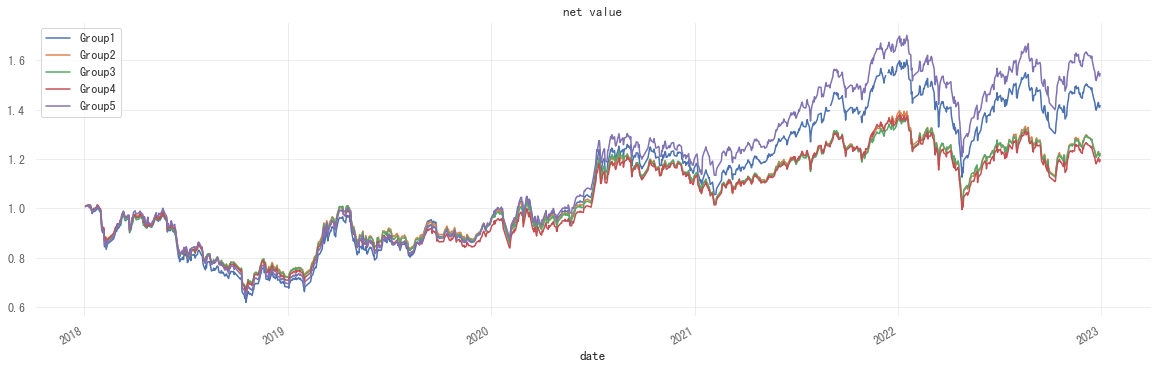

In [21]:
# ÊéíÂ∫è
ID_Vol_list = pd.DataFrame(mean_ID_Vol_deTurn20_dict.values(),index=load_model_1.keys()) #ÊääindexËÆæ‰∏∫stock codeÊñπ‰æøËØÜÂà´ÈÄâËÇ°
ID_Vol_list['code'] = stock_code
ID_Vol_list['group'] = pd.qcut(ID_Vol_list.iloc[:,0],5,labels=[1,2,3,4,5])

# Â∞ÜÁâπË¥®Ê≥¢Âä®ÁéáÂàÜÁªÑÂØπÂ∫îÂà∞ËÇ°Á•®‰∏ä
group1 = ID_Vol_list.loc[ID_Vol_list['group']==1].code
group2 = ID_Vol_list.loc[ID_Vol_list['group']==2].code
group3 = ID_Vol_list.loc[ID_Vol_list['group']==3].code
group4 = ID_Vol_list.loc[ID_Vol_list['group']==4].code
group5 = ID_Vol_list.loc[ID_Vol_list['group']==5].code

DataGroup1 = processData.loc[processData.code.isin(group1) ]
DataGroup2 = processData.loc[processData.code.isin(group2) ]
DataGroup3 = processData.loc[processData.code.isin(group3) ]
DataGroup4 = processData.loc[processData.code.isin(group4) ]
DataGroup5 = processData.loc[processData.code.isin(group5) ]


# ÂáÄÂÄºÂõûÊµã
nv_group1 = (1+DataGroup1.groupby('date')['return'].mean()).cumprod()
nv_group2 = (1+DataGroup2.groupby('date')['return'].mean()).cumprod()
nv_group3 = (1+DataGroup3.groupby('date')['return'].mean()).cumprod()
nv_group4 = (1+DataGroup4.groupby('date')['return'].mean()).cumprod()
nv_group5 = (1+DataGroup5.groupby('date')['return'].mean()).cumprod()
net_value_panel = pd.DataFrame(data = {'Group1':nv_group1,'Group2':nv_group2,'Group3':nv_group3,'Group4':nv_group4,'Group5':nv_group5})
net_value_panel.plot(title='net value',figsize=(20,6))

# Âõ†Â≠êËØÑ‰ª∑
# ËÆ°ÁÆóÂ§öÁ©∫ÁªÑÂêàÊó•Â∫¶Êî∂Áõä
Group5_PortRet = DataGroup5.groupby('TradingDate')[['return','year']].mean()
Group1_PortRet = DataGroup1.groupby('TradingDate')[['return','year']].mean()
high_low = Group5_PortRet - Group1_PortRet
high_low['year'] = Group1_PortRet['year']
high_low = high_low.reset_index()
high_low['TradingDate'] = pd.to_datetime(high_low['TradingDate'])
high_low = high_low.set_index(high_low['TradingDate'])

# ÊúÄÂ§ßÂõûÊí§
max_dd = quantstats.stats.max_drawdown((1 + high_low['return']).cumprod())
print('ÊúÄÂ§ßÂõûÊí§:',max_dd)

# ÊúàÂ∫¶ËÉúÁéá
win = quantstats.stats.win_rate(high_low['return'])
print('ÊúàÂ∫¶ËÉúÁéá:',win)


# ‰ø°ÊÅØÊØîÁéá
ir = quantstats.stats.information_ratio(high_low['return'],factors['RiskPremium1'])
print('‰ø°ÊÅØÊØîÁéá:',ir)


# Âπ¥ÂåñÊ≥¢Âä®
annual_vol = quantstats.stats.volatility(high_low['return'],periods=250)
print('Âπ¥ÂåñÊ≥¢Âä®:',annual_vol)


‰∏éÊç¢ÊâãÁéáÊ≠£‰∫§Âêé,ÁâπË¥®Ê≥¢Âä®ÁéáÈ´òÁöÑÁªÑÂêàÁöÑÊî∂ÁõäÁéáÊòæËëóÈ´ò‰∫éÂÖ∂‰ªñÁªÑ,ËØ¥ÊòéÁâπË¥®Ê≥¢Âä®ÁéáÂºÇË±°Ë¢´Ê∂àÈô§,Âá†‰πé‰∏çÂ≠òÂú®Â•óÂà©Á©∫Èó¥

2022Âπ¥Êó∂ÊØè‰∏ÄÁªÑÈÉΩÂá∫Áé∞Â∑®Â§ßÂõûÊí§,ËøôÊòØÂõûÊí§-1ÁöÑÊù•Ê∫ê

## Á∫ØÁúüÁâπË¥®Ê≥¢Âä®Âõ†Â≠ê

Ëã•Âõ†Â≠êÂÖ∑ÊúâËæÉÂº∫ÁöÑË∑®ÊúüÊà™Èù¢Áõ∏ÂÖ≥ÊÄßÔºåÂàô‰ºöÂØºËá¥Êàë‰ª¨Âú®t Êó∂ÂàªÈÄâËÇ°Êó∂ÔºåËôΩÁÑ∂Ë°®Èù¢‰∏äÂè™ÂèÇËÄÉ
‰∫Üt-1 Êó∂ÂàªÁöÑÂõ†Â≠êÂÄºÔºåÂç¥‰∏çÂèØÈÅøÂÖçÂú∞ËøûÂ∏¶‰ΩøÁî®‰∫Üt-2 Êó∂Âàª„ÄÅt-3 Êó∂Âàª„ÄÅÁîöËá≥t-4 Êó∂ÂàªÁöÑÂõ†Â≠ê
‰ø°ÊÅØÔºåËÄåËøô‰∫õÊó©ÊúüÁöÑÂõ†Â≠êÂÄºÔºåÊó†ÁñëË¢´Â§öÊ¨°ÈáçÂ§ç‰ΩøÁî®‰∫Ü„ÄÇËøôÂ∞±ÊÑèÂë≥ÁùÄÊàë‰ª¨ÊØè‰∏ÄÊúüËé∑ÂæóÁöÑÂõ†
Â≠ê‰ø°ÊÅØÔºåÂÖ∂ÂÆûÈÉΩ‰∏çÂ§üÁ∫ØÂáÄ

- ËÆ°ÁÆóÁªèÂÖ∏ÁâπË¥®Ê≥¢Âä®ÁéáÂõ†Â≠êÂíåÊ≠£‰∫§ÁâπË¥®Ê≥¢Âä®ÁéáÂõ†Â≠êÁöÑËá™Áõ∏ÂÖ≥Á≥ªÊï∞(pcf)
- ÊöÇÂèñÊªûÂêéÈò∂Êï∞N=6ÔºåÊØèÊúàÊúàÂ∫ïÂ∞ÜÊú¨ÊúàÂõ†Â≠êÂÄºÂØπËøáÂéª6‰∏™ÊúàÁöÑÂõ†Â≠êÂÄºÂÅöÂ§öÂÖÉÁ∫øÊÄßÂõûÂΩí(ÊàñËÄÖÊ†πÊçÆpcfÊù•ÈÄâÊã©ÊªûÂêéÈò∂Êï∞)
- ÂèñÊÆãÂ∑ÆÂêëÈáèùúáùëñ,ùë°ÔºåÂç≥‰∏∫ËØ•ÊúàÊâÄÊúâËÇ°Á•®ÂâîÈô§Êà™Èù¢Áõ∏ÂÖ≥ÊÄß‰πãÂêéÁöÑÊ≥¢Âä®ÁéáÂõ†Â≠êÂÄºÔºåËÆ∞‰∏∫Á∫ØÁúüÊ≥¢Âä®ÁéáÂõ†Â≠êID_Vol_deCorr„ÄÇ

Wall time: 18min 16s
Parser   : 236 ms


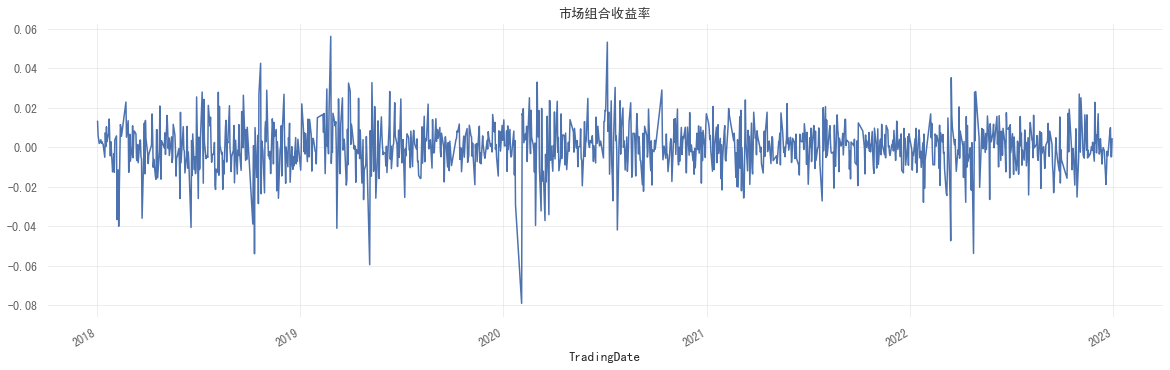

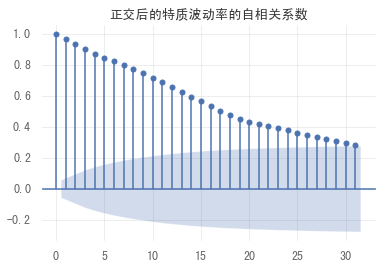

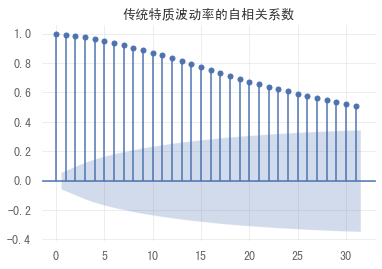

In [30]:
%%time
from statsmodels.graphics.tsaplots import plot_acf  #Ëá™Áõ∏ÂÖ≥Âõæ
factors['RiskPremium1'].plot(title='Â∏ÇÂú∫ÁªÑÂêàÊî∂ÁõäÁéá',figsize=(20,6))

ID_Vol_deTurn20_panel = pd.DataFrame()
ID_Vol_TS_panel = pd.DataFrame()
for key in load_model_1.keys():
    df0= pd.DataFrame(ID_Vol_deTurn20_TS_dict[key],columns=[key])
    ID_Vol_deTurn20_panel = pd.concat([ID_Vol_deTurn20_panel,df0],axis=1)
    
for key in load_model.keys():
    df1= pd.DataFrame(ID_Vol_TS_dict[key],columns=[key])
    ID_Vol_TS_panel = pd.concat([ID_Vol_TS_panel,df1],axis=1)    

mkt_ID_Vol_deTurn20 = ID_Vol_deTurn20_panel.mean(axis=1)
mkt_ID_Vol = ID_Vol_TS_panel.mean(axis=1)

plot_acf(mkt_ID_Vol_deTurn20.dropna(),title='Ê≠£‰∫§ÂêéÁöÑÁâπË¥®Ê≥¢Âä®ÁéáÁöÑËá™Áõ∏ÂÖ≥Á≥ªÊï∞').show()
plot_acf(mkt_ID_Vol.dropna(),title='‰º†ÁªüÁâπË¥®Ê≥¢Âä®ÁéáÁöÑËá™Áõ∏ÂÖ≥Á≥ªÊï∞').show()

<AxesSubplot:title={'center':'mkt_ID_Vol'}>

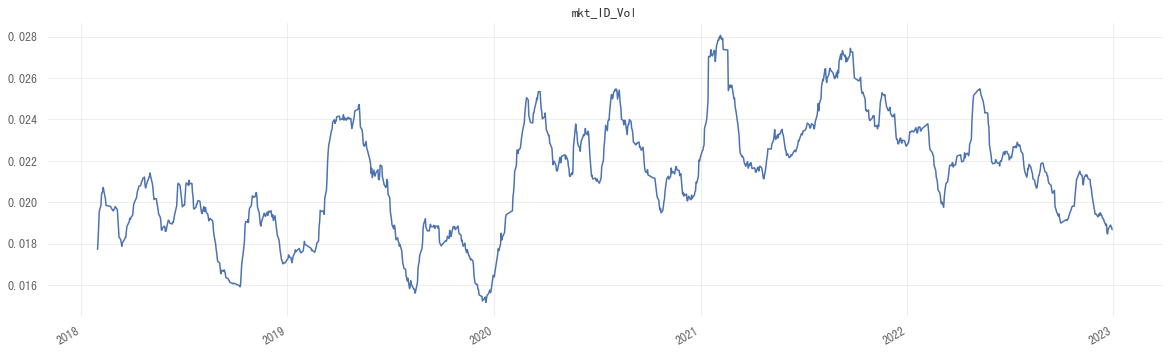

In [31]:
mkt_ID_Vol.plot(title='mkt_ID_Vol',figsize=(20,6))

<AxesSubplot:title={'center':'mkt_ID_Vol_deTurn20'}>

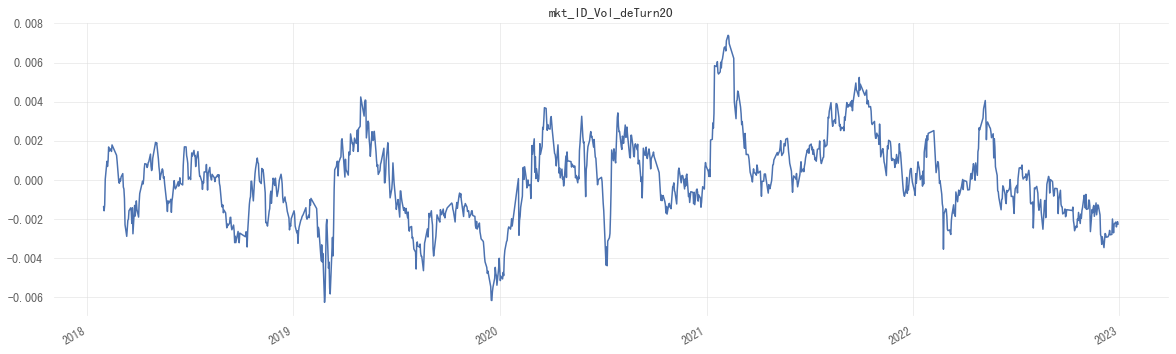

In [32]:
mkt_ID_Vol_deTurn20.plot(title='mkt_ID_Vol_deTurn20',figsize=(20,6))

- ËßÇÂØüÂ∏ÇÂú∫ÁªÑÂêàÊî∂ÁõäÁéáÂõæ,Êàë‰ª¨ÂèØ‰ª•ÂèëÁé∞Â∏ÇÂú∫ÁªÑÂêàÊî∂ÁõäÁéáÂ≠òÂú®Ê≥¢Âä®ÁéáÈõÜËÅöÁé∞Ë±°,ËØ¥ÊòéÁâπË¥®Ê≥¢Âä®ÁéáÂèØËÉΩÂ≠òÂú®Ëá™Áõ∏ÂÖ≥ÁöÑÊÉÖÂÜµ
- ËßÇÂØüËá™Áõ∏ÂÖ≥ÂõæÔºå‰º†ÁªüÁâπË¥®Ê≥¢Âä®ÁéáÁöÑËá™Áõ∏ÂÖ≥Á≥ªÊï∞ÊòéÊòæÈ´ò‰∫é‰∏éÊç¢ÊâãÁéáÊ≠£‰∫§ËøáÂêéÁöÑÁâπË¥®Ê≥¢Âä®ÁéáÁöÑËá™Áõ∏ÂÖ≥Á≥ªÊï∞ÔºåËØ¥ÊòéÊ≠£‰∫§Êç¢ÊâãÁéáÂèØ‰ª•ÁºìËß£ÁâπË¥®Ê≥¢Âä®ÁéáÂõ†Â≠êÁöÑËá™Áõ∏ÂÖ≥ÊÉÖÂÜµ
- ËßÇÂØüÁ≠âÊùÉÁöÑÂÖ®Â∏ÇÂú∫ÁªÑÂêàÁöÑÁâπË¥®Ê≥¢Âä®ÁéáÊó∂Â∫èÂõæÊàë‰ª¨‰πüÂèØ‰ª•ÂèëÁé∞Ôºå‰º†ÁªüÁâπË¥®Ê≥¢Âä®ÁéáÁöÑËá™Áõ∏ÂÖ≥Á≥ªÊï∞ÂíåÈò∂Êï∞ÂæàÈ´òÔºàÂéüÂõ†Â∫îËØ•Âú®‰∫é‰º†ÁªüÁâπË¥®Ê≥¢Âä®Áéá‰∏çÂπ≥Á®≥ÔºåË∂ãÂäøÊÄßÂæàÂº∫Ôºâ
- ËßÇÂØüËá™Áõ∏ÂÖ≥ÂõæÊàë‰ª¨ÂèØ‰ª•ÂèëÁé∞ÔºåÊó†ËÆ∫ÊòØÊ≠£‰∫§ÂêéÁöÑÁâπË¥®Ê≥¢Âä®ÁéáËøòÊòØ‰º†ÁªüÁöÑÁâπË¥®Ê≥¢Âä®ÁéáÔºåÊó∂Èó¥Â∫èÂàóÂùá‰∏çÂπ≥Á®≥„ÄÇÊåâÁÖßÂéüÊñáÁöÑÊªûÂêé6Èò∂Ëá™ÂõûÂΩíÂèñÊÆãÂ∑ÆÂæóÂà∞Á∫ØÁúüÁâπË¥®Ê≥¢Âä®ÁéáÂõ†Â≠êÊòØ‰∏çÂ§üÁßëÂ≠¶ÁöÑÔºåÂõ†‰∏∫ÁâπË¥®Ê≥¢Âä®ÁéáÂõ†Â≠êÁöÑËá™Áõ∏ÂÖ≥Èò∂Êï∞ÈùûÂ∏∏È´ò„ÄÇ
- ‰∏ã‰∏ÄÈò∂ÊÆµÁöÑÁ†îÁ©∂Â∞ÜÁùÄÂäõ‰∫éÁî®‰ªÄ‰πàÊ®°ÂûãÂàªÁîªËøô‰∏™È´òÈò∂Ëá™Áõ∏ÂÖ≥ÁöÑÂ∫èÂàó

- ÁõÆÂâçÂè™ËÉΩÊöÇÊó∂ÈááÁî®30Èò∂Ëá™ÂõûÂΩíÂèñÊÆãÂ∑ÆÁöÑÊñπÊ≥ïÊûÑÈÄ†Á∫ØÁúüÊ≥¢Âä®ÁéáÂõ†Â≠ê

In [8]:
%%time
pure_reg_results = {}
for key in load_model_1.keys():
    data = pd.DataFrame(ID_Vol_deTurn20_TS_dict[key],columns=[key]).dropna()
    #ÂâîÈô§‰∏äÂ∏Ç‰∏çË∂≥‰∏Ä‰∏™Â≠£Â∫¶ÁöÑËÇ°Á•®ÔºàÈò≤Ê≠¢Â∞èÊ†∑Êú¨ÂÅèÂ∑ÆÂíåÊó∂Èó¥Â∫èÂàóÈïøÂ∫¶‰∏çË∂≥ÁöÑÈóÆÈ¢òÔºâ
    if len(data)<=60:
        continue
    for l in range(1,31):
        data['vol_lag'+str(l)] = data.iloc[:,0].shift(l)

    exog = ['const']
    for exog_name in data.columns[1:]:
        exog.append(exog_name)

    panel = sm.add_constant(data).dropna()
    res = sm.OLS(panel.iloc[:,1],panel[exog]).fit(cov_type='HC0')
    pure_reg_results[key] = res


Wall time: 2min 42s


In [9]:
filepath = r'ID_vol/PureRegression.pkl'
saveRegressionResults(filepath,pure_reg_results)

In [10]:
filepath = r'ID_vol/PureRegression.pkl'
load_model_2 = openRegressionResults(filepath)
load_model_2

{688128: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x20196027788>,
 1: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x20196298108>,
 2: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2018506ec48>,
 600815: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x201850700c8>,
 688129: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2028a2a6048>,
 688133: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2028a2a6d88>,
 6: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2028a305948>,
 7: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2028a32c7c8>,
 8: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x201850ba088>,
 9: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x201464e2588>,
 10: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x202f5b86708>,
 11: <statsmodels.regression.linear_model.Re

In [11]:
mean_ID_Vol_deCorr_dict = {} 
ID_Vol_deCorr_TS_dict = {}
stock_code = load_model_2.keys()
for key in load_model_2.keys():
    ID_Vol_deCorr_TS_dict[key] = ((load_model_2[key].resid))
    mean_ID_Vol_deCorr_dict[key] = ((load_model_2[key].resid.mean()))

In [12]:
ID_Vol_deCorr_TS_dict[key]

2020-12-08   -0.001066
2020-12-09    0.002087
2020-12-10   -0.000227
2020-12-11   -0.003947
2020-12-14    0.001230
                ...   
2022-12-26   -0.000884
2022-12-27   -0.000960
2022-12-28   -0.000531
2022-12-29   -0.002898
2022-12-30   -0.000405
Length: 502, dtype: float64

ÊúÄÂ§ßÂõûÊí§: -1.0
ÊúàÂ∫¶ËÉúÁéá: 0.48966087675765096
‰ø°ÊÅØÊØîÁéá: -0.016805201096823274
Âπ¥ÂåñÊ≥¢Âä®: 0.043632718813333755


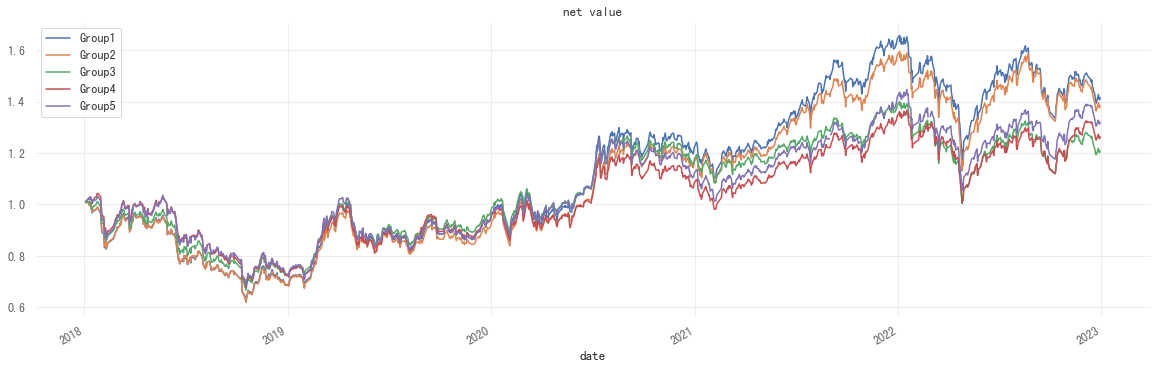

In [13]:
# ÊéíÂ∫è
ID_Vol_list = pd.DataFrame(mean_ID_Vol_deCorr_dict.values(),index=stock_code) #ÊääindexËÆæ‰∏∫stock codeÊñπ‰æøËØÜÂà´ÈÄâËÇ°
ID_Vol_list['code'] = stock_code
ID_Vol_list['group'] = pd.qcut(ID_Vol_list.iloc[:,0],5,labels=[1,2,3,4,5])

# Â∞ÜÁâπË¥®Ê≥¢Âä®ÁéáÂàÜÁªÑÂØπÂ∫îÂà∞ËÇ°Á•®‰∏ä
group1 = ID_Vol_list.loc[ID_Vol_list['group']==1].code
group2 = ID_Vol_list.loc[ID_Vol_list['group']==2].code
group3 = ID_Vol_list.loc[ID_Vol_list['group']==3].code
group4 = ID_Vol_list.loc[ID_Vol_list['group']==4].code
group5 = ID_Vol_list.loc[ID_Vol_list['group']==5].code

DataGroup1 = processData.loc[processData.code.isin(group1) ]
DataGroup2 = processData.loc[processData.code.isin(group2) ]
DataGroup3 = processData.loc[processData.code.isin(group3) ]
DataGroup4 = processData.loc[processData.code.isin(group4) ]
DataGroup5 = processData.loc[processData.code.isin(group5) ]


# ÂáÄÂÄºÂõûÊµã
nv_group1 = (1+DataGroup1.groupby('date')['return'].mean()).cumprod()
nv_group2 = (1+DataGroup2.groupby('date')['return'].mean()).cumprod()
nv_group3 = (1+DataGroup3.groupby('date')['return'].mean()).cumprod()
nv_group4 = (1+DataGroup4.groupby('date')['return'].mean()).cumprod()
nv_group5 = (1+DataGroup5.groupby('date')['return'].mean()).cumprod()
net_value_panel = pd.DataFrame(data = {'Group1':nv_group1,'Group2':nv_group2,'Group3':nv_group3,'Group4':nv_group4,'Group5':nv_group5})
net_value_panel.plot(title='net value',figsize=(20,6))

# Âõ†Â≠êËØÑ‰ª∑
# ËÆ°ÁÆóÂ§öÁ©∫ÁªÑÂêàÊó•Â∫¶Êî∂Áõä
Group5_PortRet = DataGroup5.groupby('TradingDate')[['return','year']].mean()
Group1_PortRet = DataGroup1.groupby('TradingDate')[['return','year']].mean()
high_low = Group5_PortRet - Group1_PortRet
high_low['year'] = Group1_PortRet['year']
high_low = high_low.reset_index()
high_low['TradingDate'] = pd.to_datetime(high_low['TradingDate'])
high_low = high_low.set_index(high_low['TradingDate'])

# ÊúÄÂ§ßÂõûÊí§
max_dd = quantstats.stats.max_drawdown((1 + high_low['return']).cumprod())
print('ÊúÄÂ§ßÂõûÊí§:',max_dd)

# ÊúàÂ∫¶ËÉúÁéá
win = quantstats.stats.win_rate(high_low['return'])
print('ÊúàÂ∫¶ËÉúÁéá:',win)


# ‰ø°ÊÅØÊØîÁéá
ir = quantstats.stats.information_ratio(high_low['return'],factors['RiskPremium1'])
print('‰ø°ÊÅØÊØîÁéá:',ir)


# Âπ¥ÂåñÊ≥¢Âä®
annual_vol = quantstats.stats.volatility(high_low['return'],periods=250)
print('Âπ¥ÂåñÊ≥¢Âä®:',annual_vol)


- ÂàÜÂ±ÇÁ¨¶ÂêàÁõ¥ËßâÔºöÁâπË¥®Ê≥¢Âä®ÁéáÂ∞èÁöÑÁªÑÂêàÊî∂ÁõäÁéáËæÉÈ´ò
- ËØ¥ÊòéÈáçÂ§ç‰ΩøÁî®‰πãÂâçÁöÑÂõ†Â≠ê‰ø°ÊÅØÂÅöÂÜ≥Á≠ñ‰ºöÂΩ±ÂìçÁâπË¥®Ê≥¢Âä®ÁéáÈÄâËÇ°Âõ†Â≠êÁöÑÁ∫ØÂáÄÊÄßÔºåÂ∏¶Êù•‰∏çÂøÖË¶ÅÁöÑÂô™Â£∞
- ÂØπ‰ΩøÁî®ÁâπË¥®Ê≥¢Âä®ÁéáÂõ†Â≠êÁöÑÂêØÁ§∫Ôºö‰ΩøÁî®ÁâπË¥®Ê≥¢Âä®ÁéáÂõ†Â≠êÁöÑÊó∂ÂÄôË¶ÅÊ≥®ÊÑèÂõ†Â≠êÁöÑÂ∫èÂàóÁõ∏ÂÖ≥ÊÄßÔºåÂáèÂ∞ëÊó∂Â∫è‰∏äÁöÑÂ∫èÂàóÁõ∏ÂÖ≥ÂØπÂõ†Â≠ê‰ø°ÊÅØÁöÑÂΩ±Âìç

## ÂØπÁ∫ØÁúüÁâπË¥®Ê≥¢Âä®ÁéáÂõ†Â≠êÁöÑ‰∏™‰∫∫ÁêÜËß£ÂíåÁúãÊ≥ï

- ÁâπË¥®Ê≥¢Âä®ÁéáÂºÇË±°ÁöÑ‰∏â‰∏™Êù•Ê∫êÔºàÊúâÂ≠¶ÊúØÊñáÁåÆÊîØÊíëÔºâÔºöÂ•óÂà©ÈôêÂà∂„ÄÅÊç¢ÊâãÁéáÔºà‰∫§ÊòìÊµÅÂä®ÊÄßÔºâÂíåË¥¢Âä°Âü∫Êú¨Èù¢‰∫ã‰ª∂
- Âú®‰ΩøÁî®ÁâπË¥®Ê≥¢Âä®ÁéáÂõ†Â≠êÂ•óÂà©ÁöÑÊó∂ÂÄôÔºåÈúÄË¶Å‰ªîÁªÜÊÄùËÄÉÁ≠ñÁï•ÁöÑÈÄªËæë‚Äî‚ÄîÊÉ≥ËµöÂì™‰∏Ä‰∏™Êù•Ê∫êÁöÑalphaÔºöË¥¢Âä°Âü∫Êú¨Èù¢ÔºüÂ•óÂà©ÈôêÂà∂ÔºüÁÑ∂Âêé‰ªîÁªÜÁöÑÊéíÈô§ÂÖ∂‰ªñÂΩ±ÂìçÁâπË¥®
Ê≥¢Âä®ÁéáÂõ†Â≠êÁöÑÂèòÈáèÔºåÊØîÂ¶ÇÊú¨Á†îÊä•ÂΩì‰∏≠ÊéíÈô§ÁöÑÊç¢ÊâãÁéáÂíåÂ∫èÂàóÁõ∏ÂÖ≥ÊÄß„ÄÇÂè™ÊúâÁ≤æÁªÜÂú∞ÊéíÈô§ÂÖ∂‰ªñÂèòÈáèÁöÑÂπ≤Êâ∞ÔºåÊâçËÉΩËÆ©ËæìÂÖ•Ê®°ÂûãÁöÑÊï∞ÊçÆÂíåÊ®°ÂûãÊõ¥Áõ¥ËßÇÁöÑÂèçÊò†Á≠ñÁï•ÁöÑÈÄªËæë
‰ªéËÄåÁî®ÁÆÄÂçïÁöÑÊ®°ÂûãÂíåÊÄùË∑ØËææÂà∞ÊúÄÂ•ΩÁöÑÊïàÊûú


#### Êé•‰∏ãÊù•ÂØπÁâπË¥®Ê≥¢Âä®ÁéáÂõ†Â≠êÁöÑÊîπËøõ
- ÂØªÊâæ‰∏Ä‰∏™Êõ¥ÂêàÈÄÇÁöÑÊ®°ÂûãÊù•ÂàªÁîªËøô‰∏™Â∫èÂàóÁõ∏ÂÖ≥ÊÄßÔºåÊéíÈô§‰∏çÂπ≥Á®≥Â∫èÂàóÂíåÈ´òÈò∂Ëá™Áõ∏ÂÖ≥ÂØπÁâπË¥®Ê≥¢Âä®ÁéáÁöÑÂπ≤Êâ∞ÔºàËÄÉËôëÊ®°ÂûãÁöÑgarchÊÆãÂ∑ÆÔºüÊàñËÄÖÈó®ÊßõËá™ÂõûÂΩíÊ®°ÂûãÔºüÔºâ
- ÂØªÊâæÊ≠£‰∫§ÂÖ∂‰ªñÂô™Â£∞Êù•Ê∫êÁöÑÂèòÈáè
- Ê≠£‰∫§ÁöÑÊó∂ÂÄôÊîπÁî®rolling OLSÁöÑÊÆãÂ∑ÆÔºåÁé∞Âú®Áî®ÂÖ®Â∫èÂàóÁöÑOLS‰ºöÂºïÂÖ•Êú™Êù•‰ø°ÊÅØ
- Â¶ÇÊûúÊé•ÁùÄÈááÁî®Ëá™ÂõûÂΩíÁ±ªÁöÑÊó∂Èó¥Â∫èÂàóÊ®°ÂûãÁöÑËØùÔºåÈúÄË¶ÅÂØπÊªûÂêéÂèÇÊï∞ËøõË°åË∞ÉÊï¥


#### ÂØπÂõûÊµãÁöÑÊîπËøõ
- Áî±‰∫éËÆæÂ§áÊú∫ËÉΩÈôêÂà∂ÔºåÊó†Ê≥ïËøêË°åÂÖ®Â∏ÇÂú∫ÁöÑ‰∫ã‰ª∂È©±Âä®ÂõûÊµãÊ°ÜÊû∂ËøõË°åÂõûÊµãÔºåÊé•‰∏ãÊù•‰ºöËÄÉËôëÂéªÂ∑•‰ΩçÂÄüÂä©‰∫ëËµÑÊ∫êÂÆåÂñÑËøô‰∏™ÂõûÊµãÊ°ÜÊû∂
- ÂØπË∞É‰ªìÊñπÊ≥ïÁöÑÊîπËøõÔºöÁõÆÂâçÂè™ÊòØÁÆÄÂçïÂÅö‰∫Ü‰π∞ÂÖ•Âπ∂ÊåÅÊúâ‰∫îÂπ¥ÁöÑÂõûÊµãÔºåËÄå‰∏îËøòÊòØÂü∫‰∫é‰∫îÂπ¥ÂÜÖÂπ≥ÂùáÁöÑÂõ†Â≠êÂ§ßÂ∞èÂàÜÁªÑÔºåËÄå‰∏çÊòØt0ÁöÑË∞É‰ªì„ÄÇÊú™Êù•ÈúÄË¶ÅËÆæÁΩÆ‰∏∫Âë®È¢ëÊàñËÄÖÊúàÈ¢ëËøõË°åÊµãËØïÔºà‰æùÊçÆÔºöÂ¶ÇÊûúÁ≠ñÁï•ÁöÑalphaÊù•Ê∫êÊòØÂü∫Êú¨Èù¢ÁöÑËØùÔºåÂü∫‰∫é2020-2023ÁöÑÊï∞ÊçÆÂíå‰∏≠‰ø°Âª∫ÊäïÁöÑÁ†îÊä•Ôºå‰∫ã‰ª∂ÊïàÂ∫î‰∏ÄËà¨ÂèØ‰ª•ÊåÅÁª≠Ëá≥Â∞ë‰∏ÄÂë®Ôºâ